# ANN for make simulation and make prediction in physics

# import working liberary

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.layers import InputNormalization
from keras.optimizers import RMSprop
from openpyxl import Workbook
import openpyxl
from keras.models import load_model
import numpy as np
#from keras.utils import multi_gpu_model


# test GPU

In [389]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

#if device_name != '/device:GPU:0':
#    raise SystemError('GPU device not found')

print('Found GPU at: ')
print(device_name)

Found GPU at: 



# global variables

In [390]:
# input variable to program
inputFile = 'datasets/collect data_pi-.xlsx'
inputSheetName = 'main'
outputFile = 'out_in3.xlsx'
outputSheetName = 'predicat_in3'
nameFigImg = 'fig_in3.png'


# read data

In [391]:
# Read the data from the CSV file
data = pd.read_excel(inputFile,sheet_name=inputSheetName)
#data = data[data['N part']==337]
# Split the data into input and output variables
#X = data.drop('sqrt', axis=1) #static input for each case : extra data of fiting
#X = data.drop('massno', axis=1) #static input for each case : extra data of fiting
#X = data.drop('output', axis=1)

X = data.drop('Spectrum', axis=1)
X = X.drop('err1', axis=1)
X = X.drop('err2', axis=1)
#X = data['Pt']
y = data['Spectrum']

# loada saved model

In [392]:

# Load the saved model
#model = load_model('NegPion_L9.h5')

# define the model

In [393]:

# Define the model

model = Sequential()

# Normalize the input
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
# Add the first dense layer
model.add(Dense(30, input_dim=3, activation='relu'))
# Add batch normalization
model.add(BatchNormalization())

model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(60, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))

model.add(Dense(30, activation='relu'))
# Add batch normalization
model.add(BatchNormalization())

# Add the output layer
model.add(Dense(1, activation='linear'))
# Add the output layer
#model.add(Dense(1, activation='softmax'))


# compile the model

In [394]:
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)
#model.compile(loss='mse', optimizer='adam')
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train the model

In [395]:
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=500, batch_size=16)


Epoch 1/500
72/72 [==============================] - 1s 1ms/step - loss: 565.3558
Epoch 2/500
72/72 [==============================] - 0s 1ms/step - loss: 472.5358
Epoch 3/500
72/72 [==============================] - 0s 1ms/step - loss: 396.5192
Epoch 4/500
72/72 [==============================] - 0s 1ms/step - loss: 357.7336
Epoch 5/500
72/72 [==============================] - 0s 1ms/step - loss: 279.8791
Epoch 6/500
72/72 [==============================] - 0s 1ms/step - loss: 266.6045
Epoch 7/500
72/72 [==============================] - 0s 1ms/step - loss: 238.7000
Epoch 8/500
72/72 [==============================] - 0s 1ms/step - loss: 232.8135
Epoch 9/500
72/72 [==============================] - 0s 1ms/step - loss: 214.5707
Epoch 10/500
72/72 [==============================] - 0s 1ms/step - loss: 187.8055
Epoch 11/500
72/72 [==============================] - 0s 1ms/step - loss: 173.0206
Epoch 12/500
72/72 [==============================] - 0s 1ms/step - loss: 196.9728
Epoch 13/500


# Evaluate the model

In [396]:
# Evaluate the model
#score = model.evaluate(X_train, y)
#loss, accuracy = model.evaluate(X_train, y)
loss = model.evaluate(X_train, y)
print("loss ")
print(loss)
#print("accuracy")
#print(accuracy)

36/36 [==============================] - 0s 927us/step - loss: 102.6451
loss 
102.64511108398438


# save current compiled model

In [397]:
# Save the model
model.save('NegPion_L9_test-9-5-2023-500-9L.h5')

# make prediction

In [398]:
# Make predictions on new data
#new_data = pd.read_csv('data_pion_20.csv').drop('output', axis=1)
#new_data = X
#X_test = X.to_numpy() 
X_test = scaler.transform(X)
#predictions = model.predict(new_data)
#new_data = new_data.drop('Spectrum', axis=1)

#newX = new_data['Pt']
#newX = X_test

print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
print("predictions is : ")
print(predictions)


new_data is : 
[[-1.20025974  1.76775955 -1.2954544 ]
 [-1.20025974  1.76775955 -1.19448258]
 [-1.20025974  1.76775955 -1.09351077]
 ...
 [ 1.59422635 -1.17477116  1.68321423]
 [ 1.59422635 -1.17477116  1.88515787]
 [ 1.59422635 -1.17477116  2.0871015 ]]
36/36 [==============================] - 0s 720us/step
predictions is : 
[[72.6489   ]
 [65.33768  ]
 [53.642254 ]
 ...
 [-2.4785254]
 [-2.5965526]
 [-2.7450607]]


# draw 

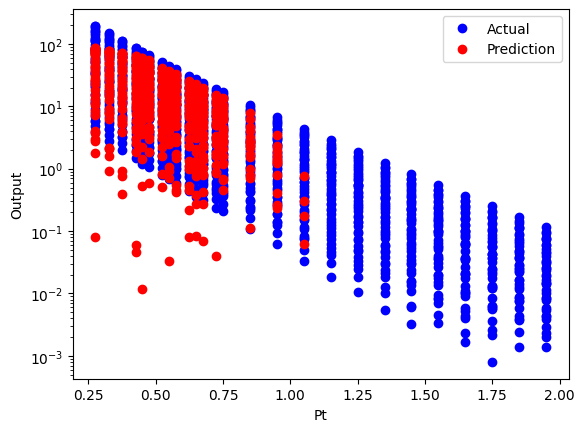

<Figure size 640x480 with 0 Axes>

In [399]:

# for drawing in 2d i choose Pt as x-axis

xx = X[X['N part']==337 and X['s']==7.7]
xg = xx['Pt']
#xg = X_test[:,2:3]

# Plot the data and predictions
plt.semilogy(xg,  y,'bo', label='Actual')
plt.semilogy(xg, predictions,'ro', label='Prediction')

#plt.scatter(xg, y)
#plt.scatter(xg, predictions)

#plt.plot(xg, y, 'bo', label='Actual')
#plt.plot(xg, predictions, 'ro', label='Predicted')
plt.xlabel('Pt')
plt.ylabel('Output')
plt.legend()

plt.show()
plt.savefig(nameFigImg)

# write output to excel 

In [400]:

# Write predictions and plot data to Excel file
#output = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten()})
#outputpredicat = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
error = np.array(y) - np.array(predictions.flatten())

outdataDict = {'Pt': xg.values.flatten(),'Actual': y.values.flatten(), 'Predicted': predictions.flatten(),'Error': error.flatten() }
#outputpredicat = pd.DataFrame({ 'Pt': xg.values.flatten(),'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
#print(outdataDict)
outputpredicat = pd.DataFrame({'Pt': xg.values.flatten(),'Actual': y.values.flatten(), 'Predicted': predictions.flatten(),'Error': error.flatten()})
# output is data frame
print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    #output.to_excel(writer, sheet_name='output', index=False)


      Pt    Actual  Predicted      Error
0  0.275  114.8980  72.648903  42.249097
1  0.325   83.9507  65.337677  18.613023
2  0.375   62.4481  53.642254   8.805846
3  0.425   46.3708  39.366131   7.004669
4  0.475   34.7823  28.604097   6.178203
5  0.525   26.3221  20.434032   5.888068
6  0.575   19.7093  13.164433   6.544867
7  0.625   15.0548  10.018852   5.035948
8  0.675   11.2735   7.631890   3.641610
9  0.725    8.7656   4.953544   3.812056


# print model summery 

In [401]:

print("End")
#print("accuracy :" + str(accuracy))
print("loss " + str(loss))
print(model.summary())

End
loss 102.64511108398438
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_243 (Dense)           (None, 30)                120       
                                                                 
 batch_normalization_29 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_244 (Dense)           (None, 30)                930       
                                                                 
 batch_normalization_30 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_245 (Dense)           (None, 60)                1860      
                                                                 
 dense_246 (Dense)       